# 911 Calls Capstone Project


This project analyzes real 911 emergency call data obtained from [Kaggle](https://www.kaggle.com/).  
The dataset contains detailed information on emergency incidents such as location, time, and category of the call.  

---

## Objectives  
The main objectives of this project are to:  
- Explore the dataset and identify **patterns in emergency calls**.  
- Analyze trends across **time dimensions** (hour, day, month).  
- Compare call volumes by **emergency type** (EMS, Fire, Traffic).  
- Use data visualization to present findings in a **clear and insightful way**.  

---

## Tools & Technologies  
The analysis was conducted using:  
- **Python** for data processing and analysis.  
- **Pandas** for data manipulation.  
- **Matplotlib** and **Seaborn** for data visualization.  
- **Jupyter Notebook** as the development environment.  

---

By performing this analysis, the project demonstrates how real-world emergency call data can be leveraged to highlight trends and uncover insights that may support decision-making.  



## Data and Setup


 * Import Required Libraries 

In [42]:
import pandas as pd
import numpy as np

* Visualization Setup  

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Load the Dataset  

In [44]:
df = pd.read_csv('911.csv')

* Data Overview

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


* Preview the Data

In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


-----
## Exploratory Data Analysis (EDA)

* Top 5 Zip Codes with the Most 911 Calls  

In [47]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

* Top 5 Townships with the Most 911 Calls  

In [48]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

* Number of Unique Emergency Call Types  

In [49]:
df['title'].nunique()

110

------
## Creating new features

* Here I generate additional features from the existing data to uncover deeper patterns in 911 calls.

For example, a title such as *"EMS: BACK PAINS/INJURY"* will be categorized under the new **Reason** column as **EMS**. 

In [50]:
df['Reason'] = df['title'].apply(lambda text : text.split(':')[0])

* Most common reason for 911 calls

In [51]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

### 911 Calls by Reason 

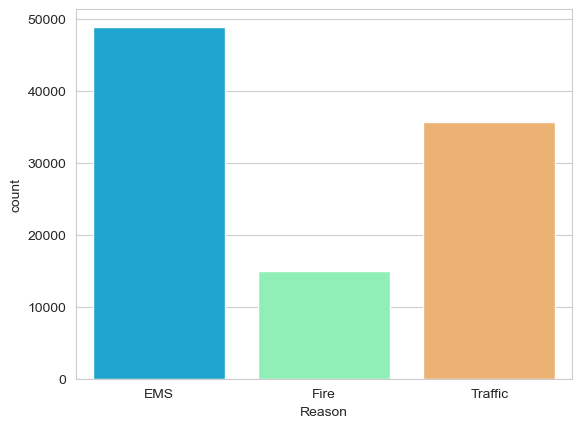

In [52]:
sns.countplot(x='Reason',data=df,palette='rainbow',hue='Reason')
plt.show()

 The plot shows that **EMS calls** are the most frequent, followed by **Traffic** and then **Fire**. This indicates that medical emergencies dominate the 911 call records.

___
* Check timeStamp data type


In [53]:
type(df['timeStamp'].iloc[0])

str

*  Convert timeStamp to DateTime


In [54]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

* ### Extract Hour, Month, and Day of Week  
From the `timeStamp` column, create new columns: **Hour**, **Month**, and **Day of Week**.


In [55]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

* **Map Day of Week to Names**


Numbers (0–6) → Weekday names (Mon–Sun)


In [56]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [57]:
df['Day of Week'] = df['Day of Week'].map(dmap)

### 911 Calls by Day of Week and Reason


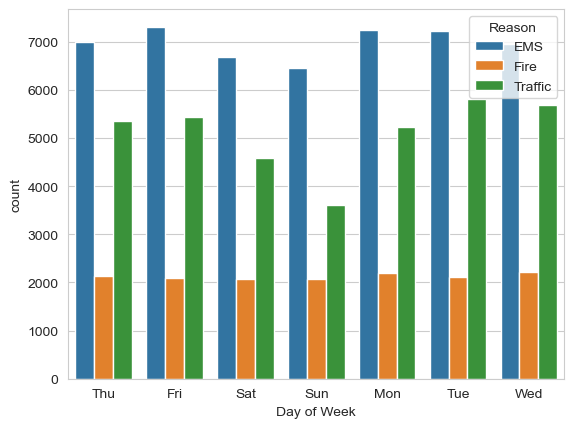

In [58]:
sns.countplot(data=df,x='Day of Week',hue='Reason')
plt.show()

This bar chart shows the distribution of 911 calls across the days of the week, separated by Reason.  
EMS calls are the most frequent on all days, Traffic calls peak on weekdays, and Fire calls stay relatively stable.

### 911 Calls by Month and Reason


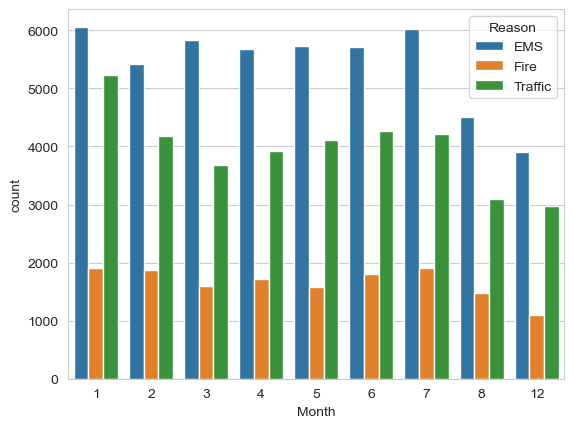

In [59]:
sns.countplot(data=df,x='Month',hue='Reason')
plt.show()

This bar chart shows the distribution of 911 calls by **month**, split by Reason (EMS, Fire, Traffic).  
- **EMS calls** are consistently the highest in every month.  
- **Traffic calls** vary more and are generally higher in the first half of the year.  
- **Fire calls** remain the lowest and most stable across months.  


_____
### Handling Missing Months  


The earlier plot skipped some months. To fix this, I group the data by **Month** to prepare for a more complete plot.


### Grouping Calls by Month  
Here I group the dataset by **Month** and count the number of calls.


In [60]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Monthly 911 Call Volume


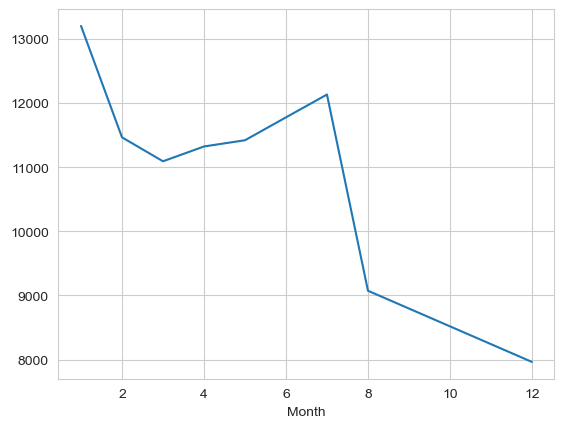

In [61]:
byMonth['twp'].plot()
plt.show()

The line plot shows that 911 calls **peak in the early months** and then **steadily decline** towards the end of the year,  
indicating a seasonal drop in emergency activity.  
  



### Trend of 911 Calls per Month


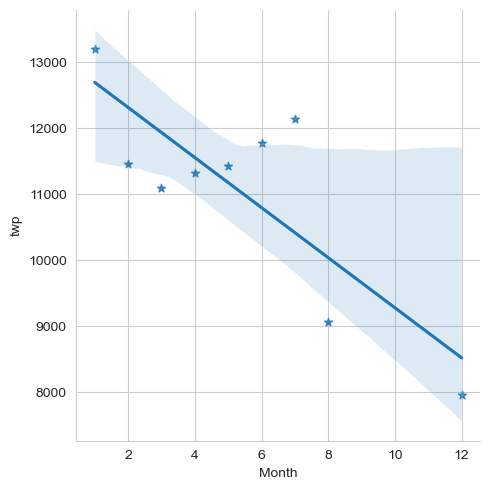

In [62]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index(),markers='*')
sns.set_style('whitegrid')
plt.show()

This scatter plot with a linear regression line shows the trend of 911 calls across months.  
The downward slope indicates a general decline in call volume as the year progresses.  

### Daily 911 Call Volume  
A new column **Date** is created from the `timeStamp` field, and the total number of calls per day is plotted.


In [63]:
df['Date'] = df['timeStamp'].apply(lambda time: time)

* Daily 911 Call Counts

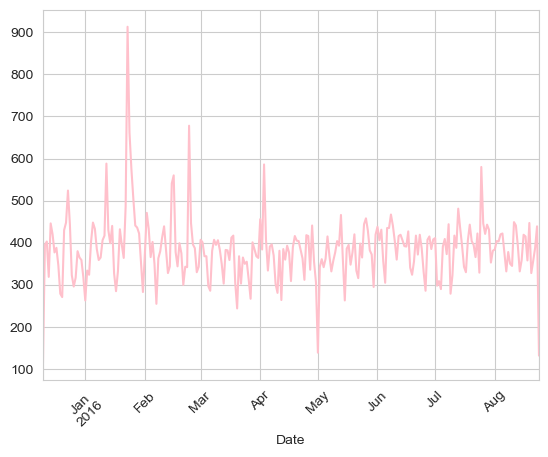

In [64]:
df.groupby('Date').count()['twp'].resample('D').sum().plot(color='pink')
plt.xticks(rotation=45)
plt.show()

This line plot shows **the daily number of 911 calls**.  
We notice sharp spikes on certain days, but overall most days stay between 300–500 calls.


### Daily 911 Calls by Reason  
Separate line plots are created for each emergency type (Traffic, Fire, EMS).


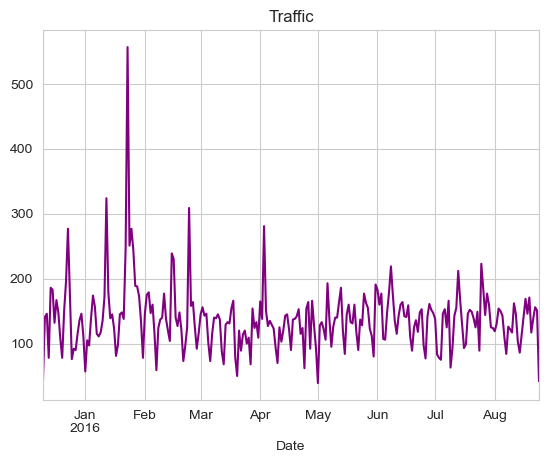

In [65]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].resample('D').sum().plot(color='purple')
plt.title('Traffic')
plt.show()

This line plot shows the daily number of **Traffic-related** 911 calls.  
The chart reveals occasional spikes, especially early in the year, while most days stay below 200 calls.  


### Daily 911 Calls – Fire


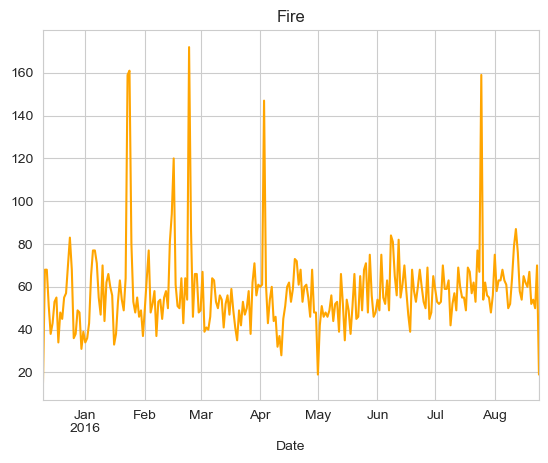

In [66]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].resample('D').sum().plot(color='orange')
plt.title('Fire')
plt.show()

This line plot shows the daily number of **Fire-related** 911 calls.  
The volume of fire calls stays relatively low compared to EMS and Traffic, but there are occasional sharp spikes.  


### Daily 911 Calls – EMS


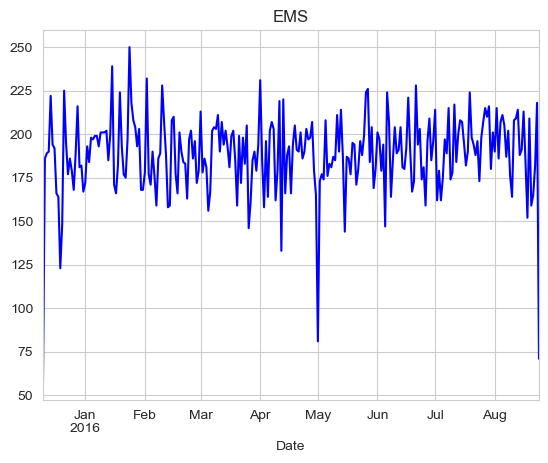

In [67]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].resample('D').sum().plot(color='blue')
plt.title('EMS')
plt.show()

This line plot shows the daily number of **EMS-related** 911 calls.  
EMS is the most frequent category overall, with consistently high daily volumes and several noticeable spikes.  

____
### Preparing Data for Heatmaps  
The data is grouped by **Day of Week** and **Hour** to create a pivot-style table for visualization.


In [68]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### Heatmap of 911 Calls by Day and Hour  
* Visualize the frequency of 911 calls across different hours of the day and days of the week.


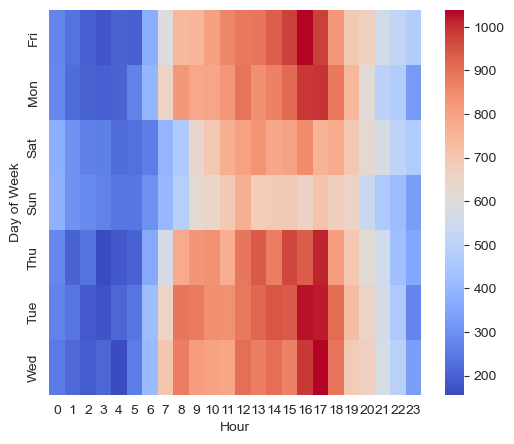

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(dayHour,cmap='coolwarm')
plt.show()

This heatmap highlights the busiest times for 911 calls.  
- Call volumes are highest between **12 PM and 6 PM** on weekdays.  
- Overnight hours (midnight to early morning) show the lowest activity.  
- The pattern is consistent across all days of the week.  


### Clustermap of 911 Calls by Day and Hour


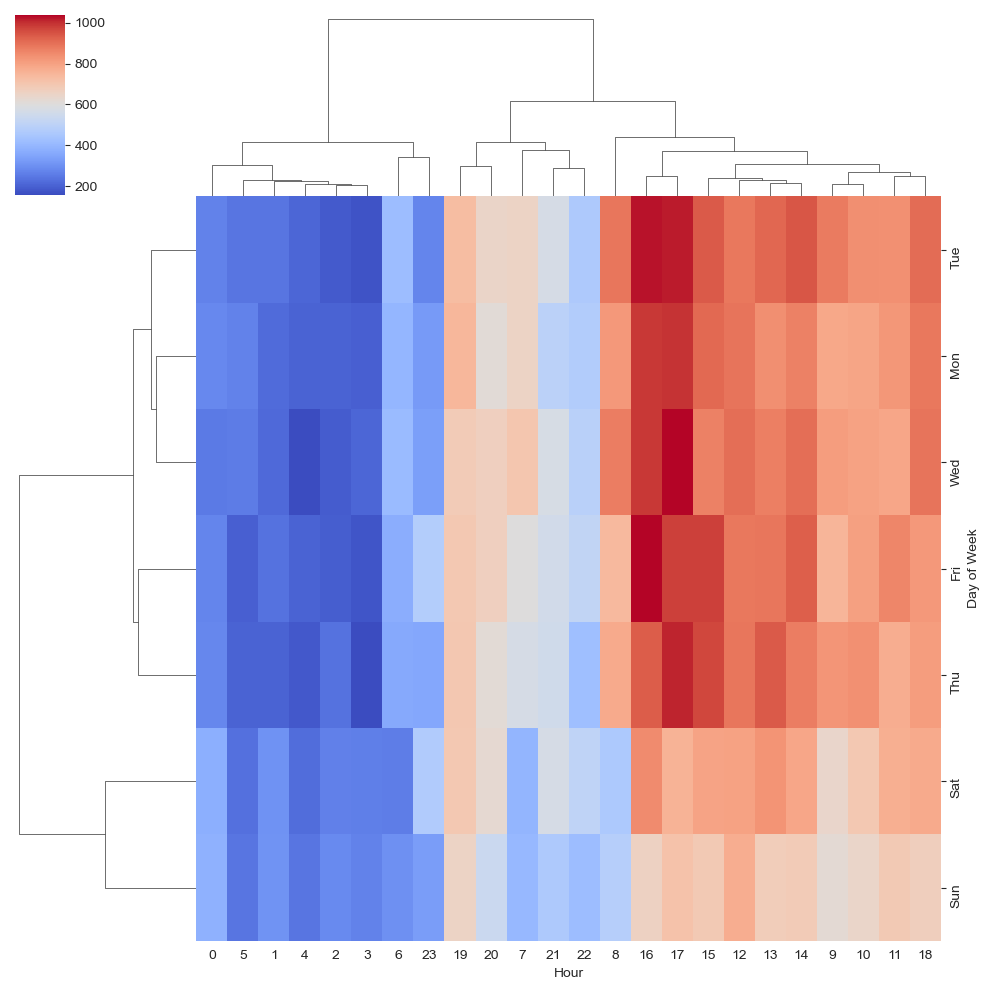

In [70]:
sns.clustermap(dayHour,cmap='coolwarm')
plt.show()

This **heatmap** illustrates the distribution of 911 calls across hours of the day and days of the week.  
- Call volumes peak between **12 PM and 6 PM**.  
- Activity is lowest during **late-night hours** (midnight to early morning).  
- The pattern remains relatively **consistent across weekdays**.  


### Preparing Data for Monthly Heatmaps  
* The data is grouped by **Month** and **Day of Week** to analyze patterns on a monthly basis.  


In [71]:
dayMonth = df.groupby(by=['Month','Day of Week']).count()['Reason'].unstack()
dayMonth.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


### Heatmap of 911 Calls by Month and Day of Week


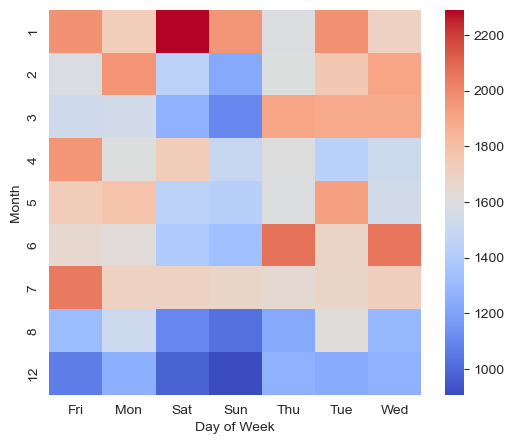

In [72]:
plt.figure(figsize=(6,5))
sns.heatmap(dayMonth,cmap='coolwarm')
plt.show()

This heatmap shows the distribution of 911 calls across **months** and **days of the week**.  

- Higher call volumes appear in the early months of the year.  
- **Saturdays and Sundays** generally have fewer calls compared to weekdays.  
- Seasonal variations are visible, with some months showing stronger activity.  


### Clustermap of 911 Calls by Month and Day of Week


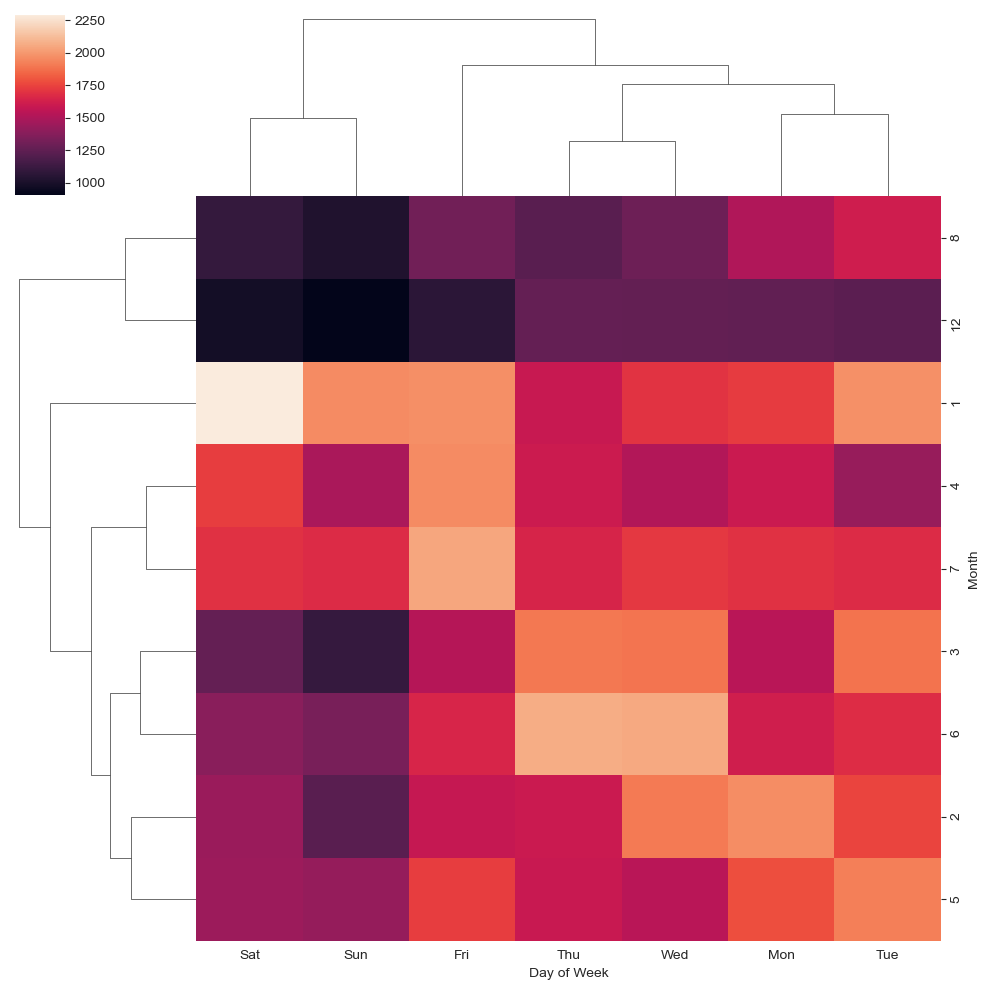

In [73]:
sns.clustermap(dayMonth)
plt.show()

This **clustermap** groups months and weekdays with similar 911 call activity patterns.  

- **Early months** of the year cluster together, showing higher call volumes.  
- **Later months** form a separate group with lower activity.  
- The clustering highlights **seasonal and weekly similarities** in emergency calls.  
